In [ ]:
#Import the dependencies
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/tweets_data.csv')
df.sample(5)

,Unnamed: 0,id,label,tweet
20271,20271,20272,0,save thousands $$ free search x logins x broke...
9337,9337,9338,0,happy #bihday #cakedecorating #fun #toys #ab...
26124,26124,26125,0,missing our day trip already #charleston #love...
25941,25941,25942,0,setting up for the atlanta 2026 little miss na...
18416,18416,18417,1,@user #allahsoil not all westerners are islamo...


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'label', 'tweet'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 31962


In [ ]:
df.shape

(31962, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31962 non-null  int64 
 1   id          31962 non-null  int64 
 2   label       31962 non-null  int64 
 3   tweet       31962 non-null  object
dtypes: int64(3), object(1)
memory usage: 998.9+ KB


In [ ]:
df.dtypes

Unnamed: 0     int64
id             int64
label          int64
tweet         object
dtype: object

In [ ]:
#Checking for null values
df.isnull().sum()

Unnamed: 0    0
id            0
label         0
tweet         0
dtype: int64

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:   31962


In [ ]:
#Check unique dependent variable Values
df['label'].unique()

array([0, 1])

In [ ]:
#Check the number of dependent values
df['label'].nunique()

2

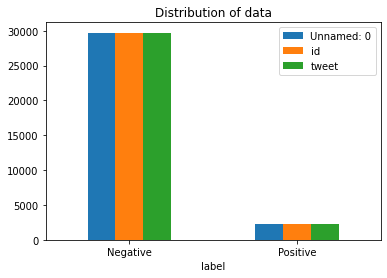

In [ ]:
#Data Visualization of Target Variables
#Plotting the distribution for dataset
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet']), list(df['label'])

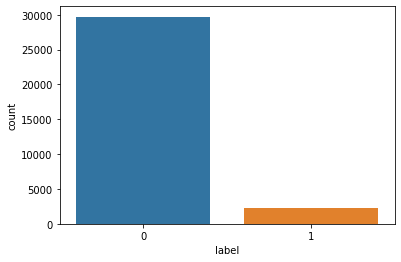

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
df.rename(columns = {'label':'Target'}, inplace = True)

In [ ]:
# Selecting the tweet and Target column for our further analysis
data = df[['tweet','Target']]

In [ ]:
#Separating positive and negative tweets
data_pos = data[data['Target'] == 1]
data_neg = data[data['Target'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(8000)]
data_neg = data_neg.iloc[:int(8000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].tail()

8592    katie hopkins: why wonât the left admit the ...
8593    i am glamorous. #i_am #positive #affirmation     
8594    ramazan hs always bn a month of barkat/blessin...
8595    simple word to tell girl. #love #single #quote...
8596    grandma got me a video game pizza a peach cobb...
Name: tweet, dtype: object

In [ ]:
#Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweet'].head()

13    @user #cnn calls #michigan middle school 'buil...
14    no comment! #australia #opkillingbay #seasheph...
17                                       retweet agree!
23                @user @user lumpy says . prove lumpy.
34    it's unbelievable 21st century we'd need somet...
Name: tweet, dtype: object

In [ ]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

8592    katie hopkins wonât left admit truth islam u...
8593                   glamorous iam positive affirmation
8594    ramazan hs always bn month barkatblessings n p...
8595    simple word tell girl love single quotes mood ...
8596    grandma got video game pizza peach cobbler yea...
Name: tweet, dtype: object

In [ ]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

8592    katie hopkins wonât left admit truth islam u...
8593                   glamorous iam positive affirmation
8594    ramazan hs always bn month barkatblessings n p...
8595    simple word tell girl love single quotes mood ...
8596    grandma got video game pizza peach cobbler yea...
Name: tweet, dtype: object

In [ ]:
# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

8592    katie hopkins wonât left admit truth islam u...
8593                   glamorous iam positive affirmation
8594    ramazan hs always bn month barkatblessings n p...
8595    simple word tell girl love single quotes mood ...
8596    grandma got video game pizza peach cobbler yea...
Name: tweet, dtype: object

In [ ]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

8592    katie hopkins wonât left admit truth islam u...
8593                   glamorous iam positive affirmation
8594    ramazan hs always bn month barkatblessings n p...
8595    simple word tell girl love single quotes mood ...
8596    grandma got video game pizza peach cobbler yea...
Name: tweet, dtype: object

In [ ]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].head()

13    [user, cnn, calls, michigan, middle, school, b...
14    [no, comment, australia, opkillingbay, seashep...
17                                     [retweet, agree]
23              [user, user, lumpy, says, prove, lumpy]
34    [its, unbelievable, st, century, wed, need, so...
Name: tweet, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_text(x))
dataset['tweet'].head()

13    [user, cnn, calls, michigan, middle, school, b...
14    [no, comment, australia, opkillingbay, seashep...
17                                     [retweet, agree]
23              [user, user, lumpy, says, prove, lumpy]
34    [its, unbelievable, st, century, wed, need, so...
Name: tweet, dtype: object

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

13    [user, cnn, calls, michigan, middle, school, b...
14    [no, comment, australia, opkillingbay, seashep...
17                                     [retweet, agree]
23              [user, user, lumpy, says, prove, lumpy]
34    [its, unbelievable, st, century, wed, need, so...
Name: tweet, dtype: object

In [ ]:
dataset['tweet']

13      [user, cnn, calls, michigan, middle, school, b...
14      [no, comment, australia, opkillingbay, seashep...
17                                       [retweet, agree]
23                [user, user, lumpy, says, prove, lumpy]
34      [its, unbelievable, st, century, wed, need, so...
                              ...                        
8592    [katie, hopkins, wonâ, t, left, admit, truth...
8593              [glamorous, iam, positive, affirmation]
8594    [ramazan, hs, always, bn, month, barkatblessin...
8595    [simple, word, tell, girl, love, single, quote...
8596    [grandma, got, video, game, pizza, peach, cobb...
Name: tweet, Length: 10242, dtype: object

In [ ]:
#Separating input feature and label
X=data.tweet
y=data.Target

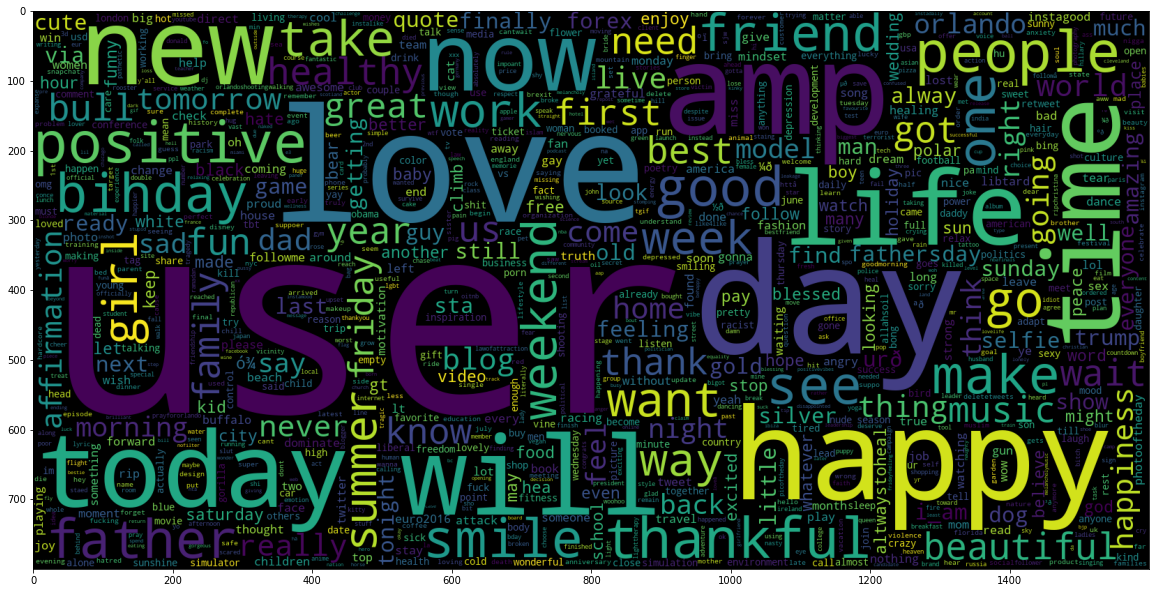

In [ ]:
#Plot a cloud of words for negative tweets
data_neg = data['tweet'][:10000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

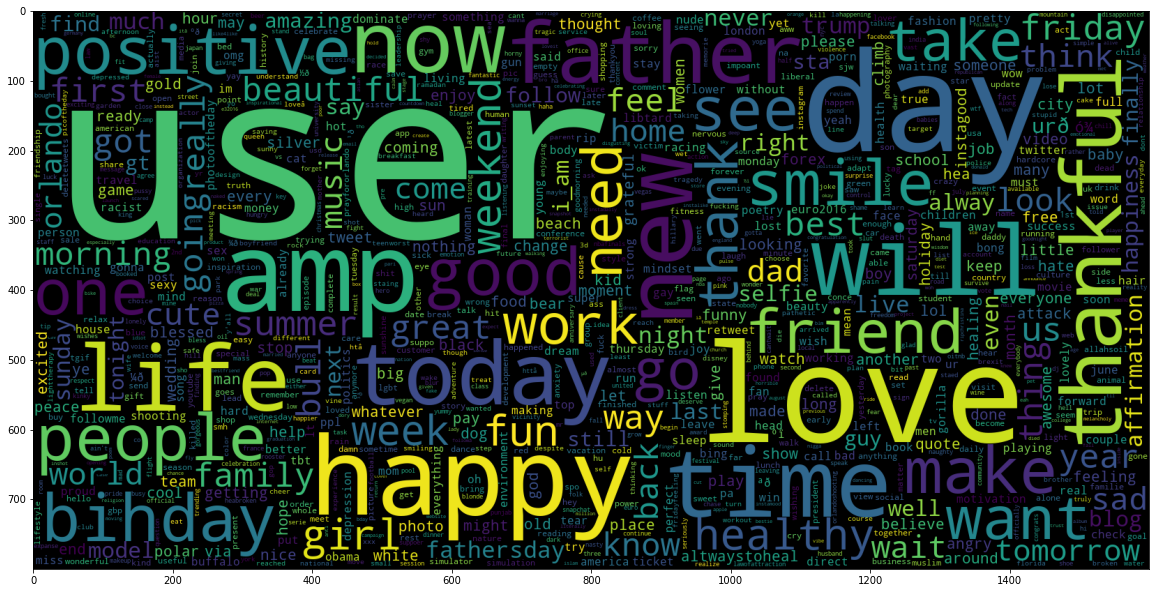

In [ ]:
# Plot a cloud of words for positive tweets
data_pos = data['tweet'][10000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
#Splitting our data into Train and Test Subset
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state =101)

In [ ]:
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=25000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  25000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4480
           1       0.91      0.55      0.68       315

    accuracy                           0.97      4795
   macro avg       0.94      0.77      0.83      4795
weighted avg       0.96      0.97      0.96      4795



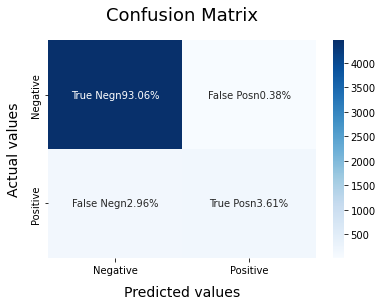

In [ ]:
#Model-1
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

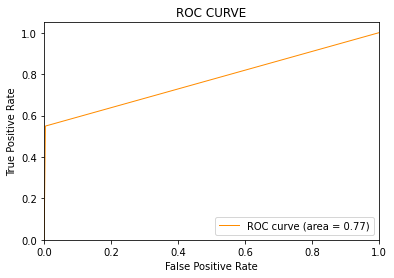

In [ ]:
#Plot the ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4480
           1       0.92      0.35      0.51       315

    accuracy                           0.96      4795
   macro avg       0.94      0.67      0.74      4795
weighted avg       0.95      0.96      0.95      4795



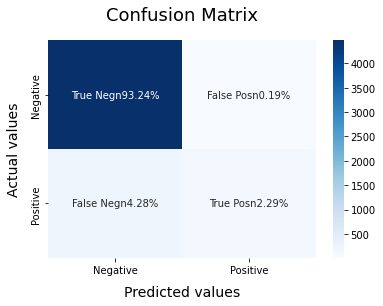

In [ ]:
#Model-2
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

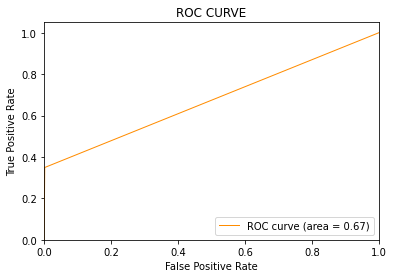

In [ ]:
#Plot the ROC-AUC Curve for model-2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()